In [23]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('heart_v2.csv')

In [25]:
print(df.shape)
df.info()

(270, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [26]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [27]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

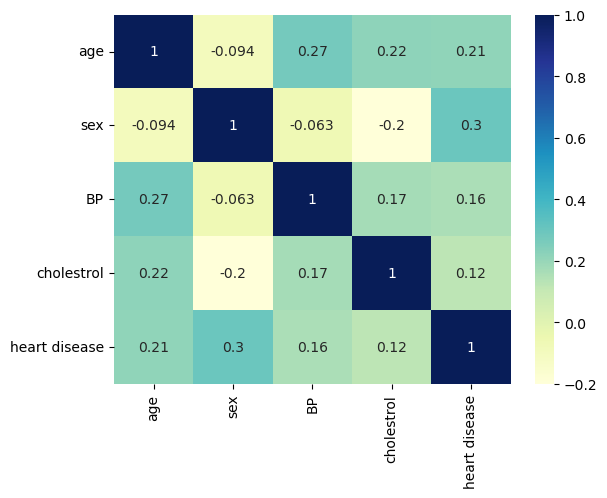

In [29]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

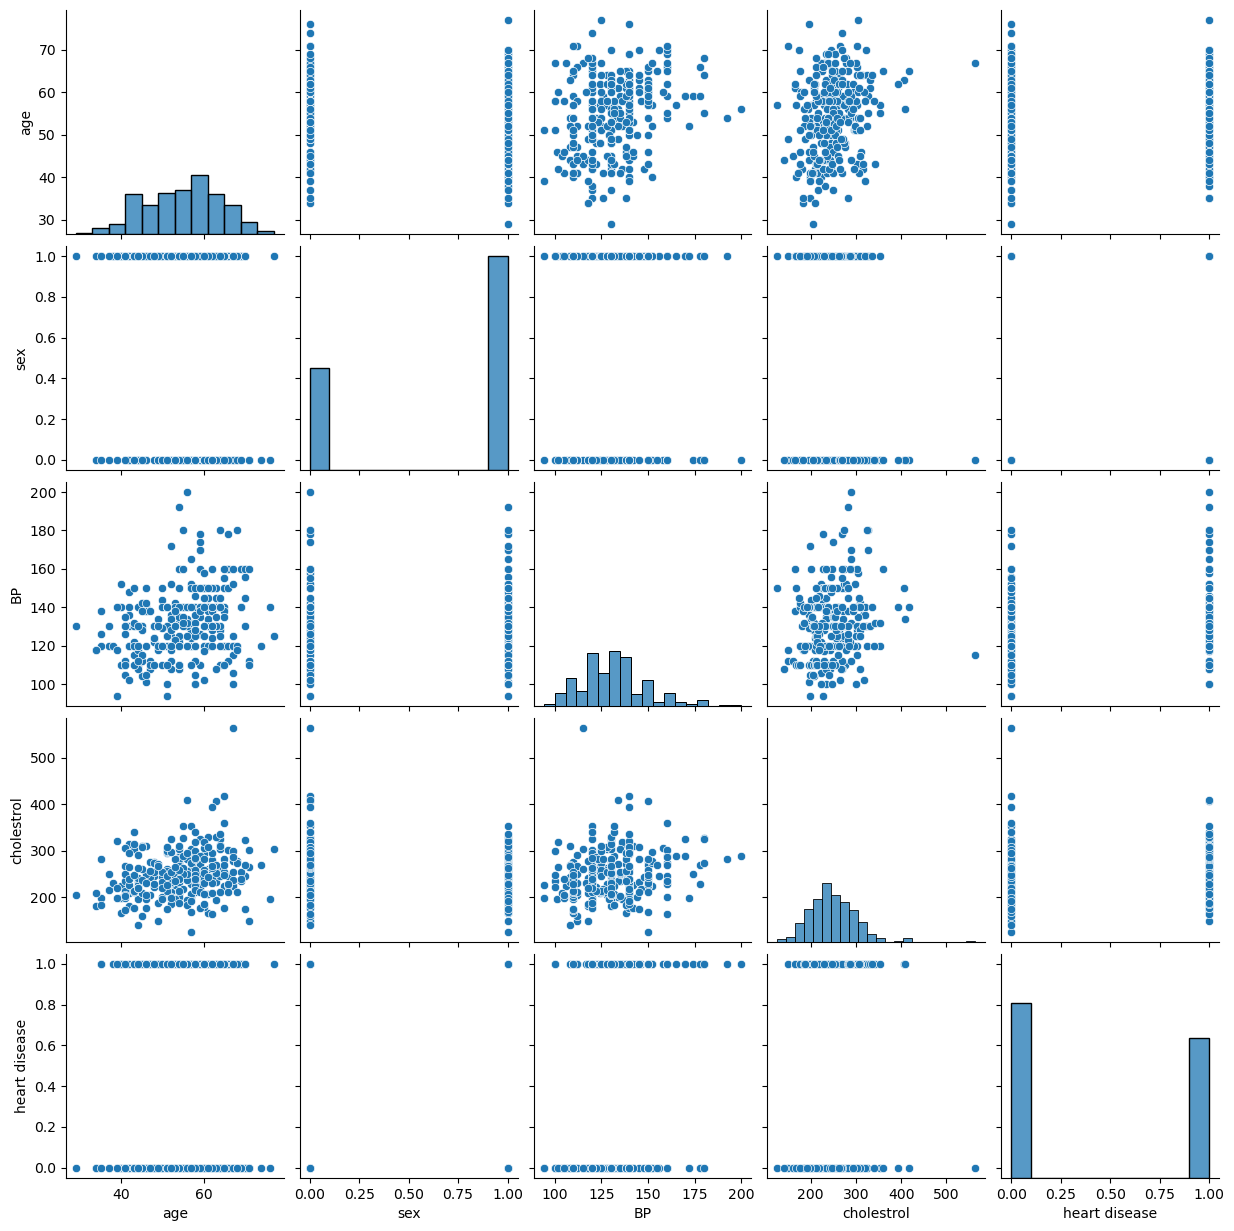

In [30]:
sns.pairplot(df)

In [31]:
y = df['heart disease']
X = df.drop('heart disease', axis=1)

In [32]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [33]:
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(270, 4) (270,)
(189, 4) (81, 4) (189,) (81,)


In [34]:
X_train.describe()

,age,sex,BP,cholestrol
count,189.000000,189.000000,189.000000,189.000000
mean,54.751323,0.693122,131.809524,251.529101
std,9.132393,0.462423,17.952233,52.554890
min,29.000000,0.000000,94.000000,141.000000
25%,48.000000,0.000000,120.000000,215.000000
50%,56.000000,1.000000,130.000000,244.000000
75%,62.000000,1.000000,140.000000,282.000000
max,74.000000,1.000000,200.000000,564.000000


In [35]:
X_test.describe()

,age,sex,BP,cholestrol
count,81.000000,81.000000,81.000000,81.000000
mean,53.691358,0.641975,130.259259,245.296296
std,9.067307,0.482407,17.711421,49.644094
min,35.000000,0.000000,94.000000,126.000000
25%,46.000000,0.000000,120.000000,208.000000
50%,54.000000,1.000000,130.000000,249.000000
75%,59.000000,1.000000,140.000000,273.000000
max,77.000000,1.000000,192.000000,407.000000


In [36]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [37]:
X_train_scaled.describe()

,age,sex,BP,cholestrol
count,189.000000,189.000000,189.000000,189.000000
mean,0.572252,0.693122,0.356694,0.261298
std,0.202942,0.462423,0.169361,0.124243
min,0.000000,0.000000,0.000000,0.000000
25%,0.422222,0.000000,0.245283,0.174941
50%,0.600000,1.000000,0.339623,0.243499
75%,0.733333,1.000000,0.433962,0.333333
max,1.000000,1.000000,1.000000,1.000000


In [38]:
X_test_scaled.describe()

,age,sex,BP,cholestrol
count,81.000000,81.000000,81.000000,81.000000
mean,0.445032,0.641975,0.369992,0.424542
std,0.215888,0.482407,0.180729,0.176669
min,0.000000,0.000000,0.000000,0.000000
25%,0.261905,0.000000,0.265306,0.291815
50%,0.452381,1.000000,0.367347,0.437722
75%,0.571429,1.000000,0.469388,0.523132
max,1.000000,1.000000,1.000000,1.000000


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

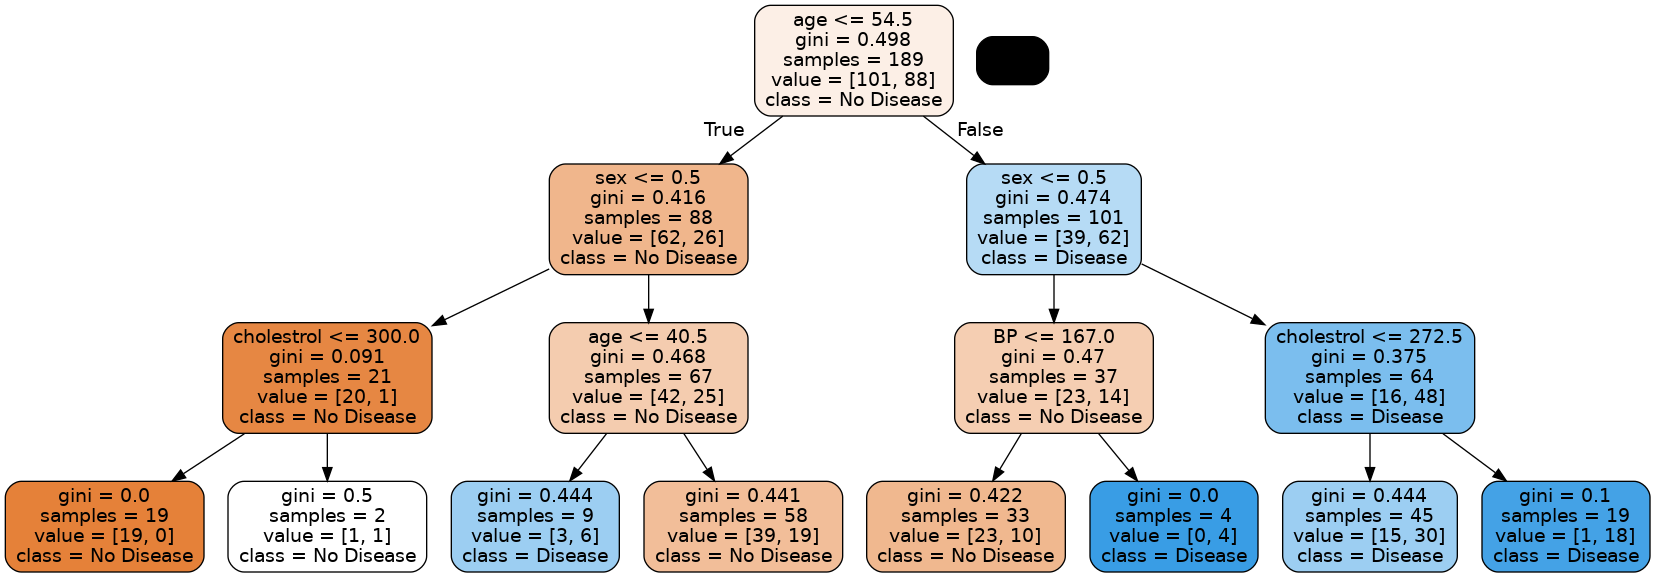

In [42]:
dot_data = StringIO()

export_graphviz(dt, out_file = dot_data, filled = True, rounded=True, feature_names=X_train.columns, class_names = ['No Disease', 'Disease'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [49]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [50]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.7407407407407407
0.6049382716049383


In [51]:
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[82 19]
 [30 58]]
[[35 14]
 [18 14]]
